### DSCI 100 008 Final Project
# Title: What it takes to be Ballin': An analysis of NBA player statistics and their effect on salary.

### Group 33: Paul Daoud | Ahnaf Kabir | Shawn Gabriel | Jackie Crowley

### Introduction

### Method and Results

#### Importing Libraries
We used functions from the `tidyverse` library to manipulate data frames and use KNN algorithms. 

In [60]:
# importing libraries
library(tidyverse)
library(dplyr)
library(tidyr)
library(reshape2)

Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [59]:
install.packages("reshape2")

also installing the dependencies 'cli', 'glue', 'lifecycle', 'rlang', 'vctrs', 'stringr'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.6.1              TRUE
glue       1.4.2  1.6.2              TRUE
lifecycle  1.0.0  1.0.4             FALSE
rlang     0.4.11  1.1.2              TRUE
vctrs      0.3.8  0.6.5              TRUE
stringr    1.4.0  1.5.1             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jc13\AppData\Local\Temp\RtmpU1D8pl\downloaded_packages


installing the source packages 'lifecycle', 'stringr'

Warning message in install.packages("reshape2"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("reshape2"):
"installation of package 'stringr' had non-zero exit status"

Overall Plan for the project:

### 1. Data Cleaning and Preprocessing:
- Check for missing values (none)
- Index column can be removed
- Ensure all data types are appropriate for analysis
### 2. Exploratory Data Analysis (EDA):
- Examine the distribution of key variables like salary, age, and performance metrics
- Look for any outliers or anomalies
### 3. Correlation Analysis:
- Investigate the correlation between different performance metrics and salaries (correlation matrix)
- Identify top prospects for good salary predictors
### 4. Feature Selection:
- Based on the EDA and correlation analysis, select relevant features for modeling.
- Consider excluding columns that may not contribute to the prediction of salary
### 5. Modelling:
- Regression models, start with linear regression and then see if more complex ones are necessary
### 6. Model Evaluation:
- Evaluate model's performance with RMSE
- Check for underfitting or overfitting

### 1. Data Cleaning and Preprocessing:
- Check for missing values (none)
- Index column can be removed
- Ensure all data types are appropriate for analysis

To begin, we want to set the seed for reproducability, and load our dataset into the NBA_salary_data object.

In [13]:
set.seed(1234)

NBA_salary_data <- read.csv("nba_players_stats_with_salary.csv")
NBA_salary_data

X,Player.Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV.,USG.,OWS,DWS,WS,WS.48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
5,Bradley Beal,43279250,SG,29,WAS,50,50,33.5,8.9,...,12.9,29.2,2.2,1.2,3.4,0.099,2.9,-1.2,1.8,1.6
6,Kawhi Leonard,42492492,SF,31,LAC,52,50,33.6,8.6,...,8.1,27.0,4.9,2.2,7.1,0.194,5.1,0.9,6.1,3.5
7,Paul George,42492492,SF,32,LAC,56,56,34.6,8.2,...,13.4,29.5,2.3,2.3,4.6,0.114,2.4,0.3,2.8,2.3
8,Giannis Antetokounmpo,42492492,PF,28,MIL,63,63,32.1,11.2,...,13.2,38.8,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4
9,Damian Lillard,42492492,PG,32,POR,58,58,36.3,9.6,...,11.7,33.8,8.2,0.8,9.0,0.205,8.3,-1.2,7.1,4.9


Right away, we notice a couple strange housekeeping issues. For example, in our original data file, all the column names were written our nicely. Yet when we loaded it into a data set, some column names have been changed. Because we are dealing with up to 52 columns, it is crucial that we are all on the same page with what these columns are named. Furthermore, some column names in the original file are not very R-friendly (such as "3P%"), let's change these to be descriptive and syntactically friendly. Let's see what they have been changed to and fix them accordingly

In [19]:
print(colnames(NBA_salary_data))

 [1] "X"             "Player.Name"   "Salary"        "Position"     
 [5] "Age"           "Team"          "GP"            "GS"           
 [9] "MP"            "FG"            "FGA"           "FG."          
[13] "X3P"           "X3PA"          "X3P."          "X2P"          
[17] "X2PA"          "X2P."          "eFG."          "FT"           
[21] "FTA"           "FT."           "ORB"           "DRB"          
[25] "TRB"           "AST"           "STL"           "BLK"          
[29] "TOV"           "PF"            "PTS"           "Total.Minutes"
[33] "PER"           "TS."           "X3PAr"         "FTr"          
[37] "ORB."          "DRB."          "TRB."          "AST."         
[41] "STL."          "BLK."          "TOV."          "USG."         
[45] "OWS"           "DWS"           "WS"            "WS.48"        
[49] "OBPM"          "DBPM"          "BPM"           "VORP"         


In [39]:
names(NBA_salary_data)[names(NBA_salary_data) == "Player Name"] <- "Player_Name"

names(NBA_salary_data)[names(NBA_salary_data) == "X"] <- "Index"

names(NBA_salary_data)[names(NBA_salary_data) == "X3P"] <- "Three_Pts_Made"

names(NBA_salary_data)[names(NBA_salary_data) == "X3PA"] <- "Three_Pt_Atmps"

names(NBA_salary_data)[names(NBA_salary_data) == "X3P."] <- "Three_Pt_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "X2PA"] <- "Two_Pt_Atmps"

names(NBA_salary_data)[names(NBA_salary_data) == "X2P"] <- "Two_Pt_Made"

names(NBA_salary_data)[names(NBA_salary_data) == "Two_Point_Pct"] <- "Two_Pt_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "eFG."] <- "eFG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "FT."] <- "FT_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "Total.Minutes"] <- "Total_Minutes"

names(NBA_salary_data)[names(NBA_salary_data) == "TS."] <- "TS_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "X3PAr"] <- "Three_Pt_AR"

names(NBA_salary_data)[names(NBA_salary_data) == "ORB."] <- "ORB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "DRB."] <- "DRB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "TRB."] <- "TRB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "AST."] <- "AST_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "STL."] <- "STL_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "BLK."] <- "BLK_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "TOV."] <- "TOV_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "USG."] <- "USG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "WS_48"] <- "WS_48M"

In [40]:
print(colnames(NBA_salary_data))

 [1] "Index"          "Player_Name"    "Salary"         "Position"      
 [5] "Age"            "Team"           "GP"             "GS"            
 [9] "MP"             "FG"             "FGA"            "FG."           
[13] "Three_Pts_Made" "Three_Pt_Atmps" "Three_Pt_Pct"   "Two_Pt_Made"   
[17] "Two_Pt_Atmps"   "Two_Pt_Pct"     "eFG_Pct"        "FT"            
[21] "FTA"            "FT_Pct"         "ORB"            "DRB"           
[25] "TRB"            "AST"            "STL"            "BLK"           
[29] "TOV"            "PF"             "PTS"            "Total_Minutes" 
[33] "PER"            "TS_Pct"         "Three_Pt_AR"    "FTr"           
[37] "ORB_Pct"        "DRB_Pct"        "TRB_Pct"        "AST_Pct"       
[41] "STL_Pct"        "BLK_Pct"        "TOV_Pct"        "USG_Pct"       
[45] "OWS"            "DWS"            "WS"             "WS.48"         
[49] "OBPM"           "DBPM"           "BPM"            "VORP"          


MUCH better. It was a bit tedious, but it will make our work later on a lot easier and less prone to errors. Let's continue

Now, if we manually scroll through our data file, we see there are some empty cells (very few, only 4). These should be handled accordingly. These four cells are empty due to two reasons:
- The player did not attempt any free throws during the season, resulting in a blank cell for their "Free Throw Percentage"
- The player did not attempt any 2-Pt shots during the season, resulting in a blank cell for their "2-Pt Shot Percentage"

In [38]:
selected_players <- NBA_salary_data %>%
filter(Player_Name %in% c('Frank Jackson', 'Deonte Burton', 'Jordan Schakel', 'Jacob Gilyard')) %>%
select(Player_Name, 'Two_Pt_Atmps', 'Two_Pt_Pct', 'FTA', 'FT_Pct')

selected_players

Player_Name,Two_Pt_Atmps,Two_Pt_Pct,FTA,FT_Pct
Frank Jackson,2.0,0,0,NA
Deonte Burton,0.5,0,0,NA
Jordan Schakel,0.5,0,0,NA
Jacob Gilyard,0.0,NA,0,NA


As we can see, the first three players did not attempt any free throws, and the last player did not attempt any 2-Pt shots or free throws. Conveniently, R already replaces these values with "NA" which is statistically appropriate, since a 0% would imply failure when there were in fact, no attempts.

### 2. Exploratory Data Analysis (EDA):
- Examine the distribution of key variables like salary, age, and performance metrics
- Look for any outliers or anomalies

EDIT THIS:
Honestly, everything looks good. The percentages are all chill. We could look at the distribution of salary, age, and performance stats though... HMMMMM

### 3. Correlation Analysis:
- Investigate the correlation between different performance metrics and salaries (correlation matrix)
- Identify top prospects for good salary predictors

Now that we have successfully loaded our dataset and tidied it up, we can now work on figuring out which statistics will most likely be good predictors for salary, and explore those further.

For example, we can generally assume that stats such as minutes played or steals per game will not be as influential on salary as points per game or win shares, but how would we be certain about which statistics are best predictors?

A common way of figuring out which two variables have a strong relationship between each other, especially in a setting such as ours where we are not quite sure what the nature of the relationship might be, is to use a correlation matrix (REF= https://towardsdatascience.com/correlation-matrix-demystified-3ae3405c86c1). This will tell us which variables have a strong correlation with each other, which is a good basis for further exploration. If we find some performance metrics have very low correlation with salary, we can effectively rule those out. 

In [63]:
target_performance_stats <- subset(NBA_salary_data, select = -c(Index, Position, Player_Name, Position, Team))

cor_matrix <- cor(target_performance_stats, use = "complete.obs")

Now, we have created the correlation matrix, let's try visualizing it with a heatmap. 

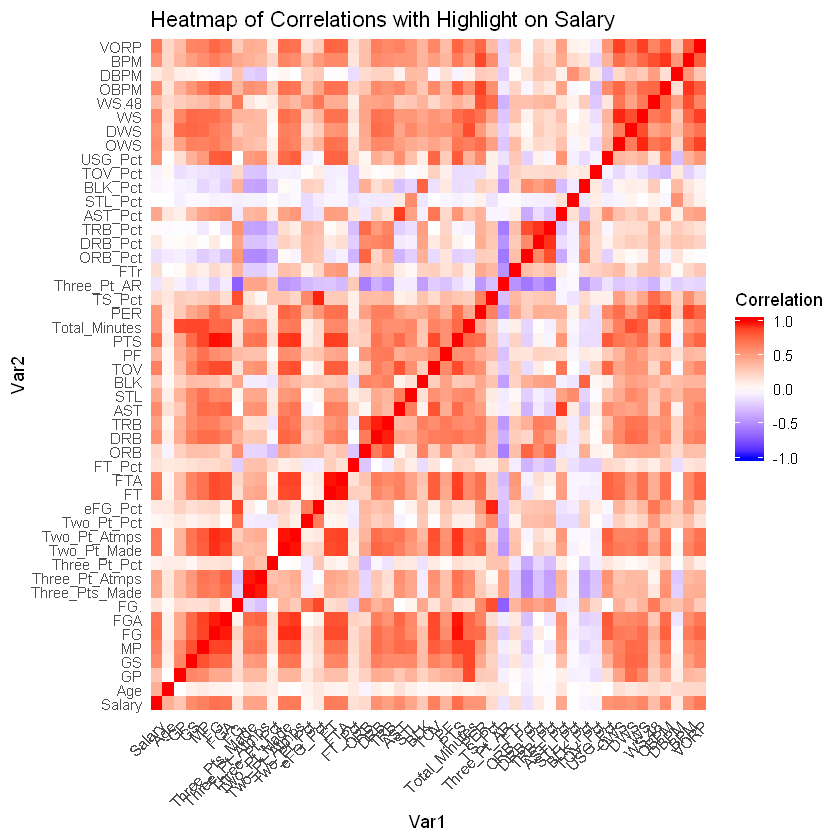

In [64]:
cor_long <- cor_matrix %>%
melt(cols = everything(), names_to = "Var2", values_to = "Correlation")

ggplot(cor_long, aes(x=Var1, y=Var2, fill=value)) +
geom_tile() +
scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1,1)) +
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
geom_vline(xintercept = which(names(cor_matrix) == "Salary"), color = "green", size = 1.5) +
  geom_hline(yintercept = which(names(cor_matrix) == "Salary"), color = "green", size = 1.5) +
  labs(fill = "Correlation", title = "Heatmap of Correlations with Highlight on Salary")

This is a great start. It looks very cool and colourful, but it is a bit hard to read. Since we are only interested in the correlations between performance stats and salary, we can isolate for these correlations, and rank them in descending order. 

In [65]:

#heatmap(cor_matrix)

salary_correlations <- cor_matrix["Salary", ]

sorted_salary_correlations <- sort(salary_correlations, decreasing = TRUE)

sorted_salary_correlations

Salary            PTS             FG            FGA           VORP 
  1.0000000000   0.7191173336   0.7118509280   0.6966823647   0.6768492637 
  Two_Pt_Atmps    Two_Pt_Made             FT            FTA            TOV 
  0.6715820234   0.6675550693   0.6645510390   0.6595895988   0.6431081241 
            MP             WS           OBPM            AST             GS 
  0.6417385312   0.6162372741   0.6000296867   0.5891035926   0.5889257613 
           OWS            DRB            BPM        USG_Pct            DWS 
  0.5765526833   0.5677576398   0.5577456362   0.5565113689   0.5498690356 
 Total_Minutes            PER            TRB Three_Pt_Atmps Three_Pts_Made 
  0.5463765746   0.5373134923   0.4925254786   0.4739628546   0.4621655033 
           STL        AST_Pct            Age             PF          WS.48 
  0.4616304850   0.4547321061   0.4137984119   0.3861162032   0.3448925913 
            GP            BLK            ORB         TS_Pct            FTr 
  0.3009336031   0.2908862283   0.2002398018   0.1920965177   0.1750457743 
        FT_Pct            FG.        eFG_Pct        DRB_Pct           DBPM 
  0.1565122461   0.1294987211   0.1204278512   0.1147237989   0.1121376540 
  Three_Pt_Pct     Two_Pt_Pct        TRB_Pct        STL_Pct        BLK_Pct 
  0.0667153966   0.0439189198   0.0207517590  -0.0003385747  -0.0465065932 
       TOV_Pct    Three_Pt_AR        ORB_Pct 
 -0.0551807178  -0.1173386874  -0.1368441671

Beautiful. Now we can see the top performance metrics that have the strongest correlation to salary. The number one statistic being PTS (Average points scored per game). 

Now, we have a few good stats to use when building our predictive model. 

### 4. Feature Selection:
- Based on the EDA and correlation analysis, select relevant features for modeling.
- Consider excluding columns that may not contribute to the prediction of salary

Let's begin by exploring an obvious relationship, the correlation between Points Per Game and Salary.

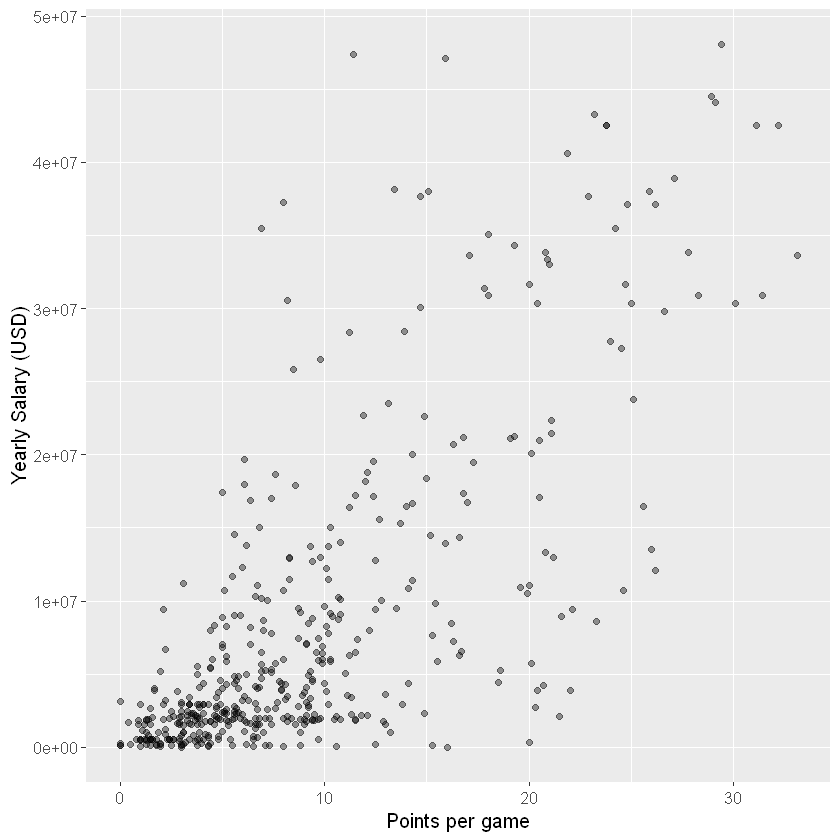

In [15]:
ppg_correlation <- ggplot(NBA_salary_data, aes(x = PTS, y = Salary)) +
geom_point(alpha = 0.4) +
xlab("Points per game") +
ylab("Yearly Salary (USD)") +
theme(text = element_text(size = 12))

ppg_correlation

We can see from the plot that there is a somewhat linear relationship between points per game and yearly salary of NBA players. Since the team with more points ultimately wins games, this makes sense. However, in order to see which statistic has the highest correlation, we need to create a correlation matrix. 

However, we don't want to run it with ALL the variables, as some will very likely not have any correlation at all (such as steal percentage). We must first select the top 6 best guesses and then create a correlation matrix. 

### Analysis and

In [ ]:
##Test commit

### Discussion

### References